In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
customers=pd.read_csv('customer_behavior_analytcis.csv')

In [112]:
customers

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
0,7.0,129.34,52.17,18.0,0.0,CM00000
1,22.0,24.18,9.19,15.0,7.0,CM00001
2,2.0,32.18,90.69,50.0,2.0,CM00002
3,25.0,26.85,11.22,16.0,10.0,CM00003
4,7.0,125.45,34.19,30.0,3.0,CM00004
...,...,...,...,...,...,...
994,5.0,64.64,72.70,50.0,1.0,CM00994
995,5.0,68.36,75.41,43.0,1.0,CM00995
996,18.0,19.53,28.77,18.0,8.0,CM00996
997,4.0,28.97,72.27,57.0,3.0,CM00997


In [113]:
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purchases   979 non-null    float64
 1   avg_cart_value    979 non-null    float64
 2   total_time_spent  999 non-null    float64
 3   product_click     979 non-null    float64
 4   discount_counts   999 non-null    float64
 5   customer_id       999 non-null    object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB
None


In [114]:
# print(customers.describe())

Handling misisng values

In [115]:
print(customers.isnull().sum()) 

total_purchases     20
avg_cart_value      20
total_time_spent     0
product_click       20
discount_counts      0
customer_id          0
dtype: int64


In [116]:
# Fill the missing values:
# total_purchases   : mean
# avg_cart_value      : mean
# product_click       : mean

null_rows = customers[customers["total_purchases"].isnull()]
print(null_rows[["total_purchases", "avg_cart_value", "product_click"]])


     total_purchases  avg_cart_value  product_click
97               NaN             NaN            NaN
139              NaN             NaN            NaN
212              NaN             NaN            NaN
253              NaN             NaN            NaN
294              NaN             NaN            NaN
310              NaN             NaN            NaN
317              NaN             NaN            NaN
353              NaN             NaN            NaN
409              NaN             NaN            NaN
425              NaN             NaN            NaN
549              NaN             NaN            NaN
555              NaN             NaN            NaN
605              NaN             NaN            NaN
622              NaN             NaN            NaN
674              NaN             NaN            NaN
765              NaN             NaN            NaN
920              NaN             NaN            NaN
924              NaN             NaN            NaN
936         

In [117]:
customers = customers.dropna(subset=["total_purchases", "avg_cart_value", "product_click"])

In [118]:
customers = customers.drop(columns=["customer_id"])

Handling Duplicates

In [119]:
duplicate_rows = customers[customers.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 0


Database Visualization

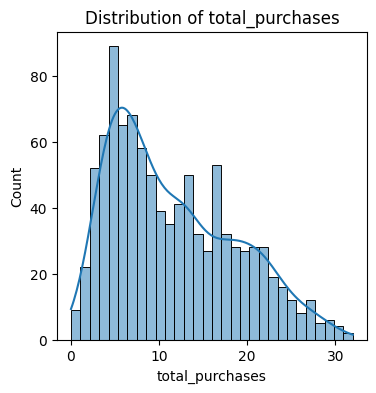

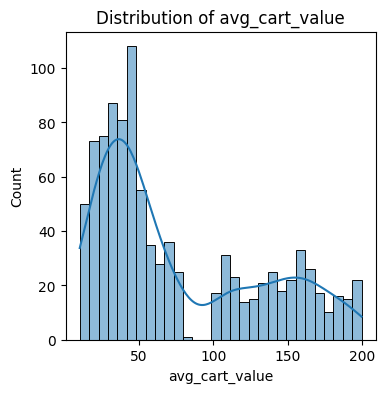

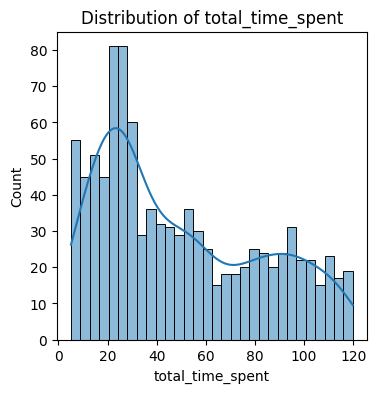

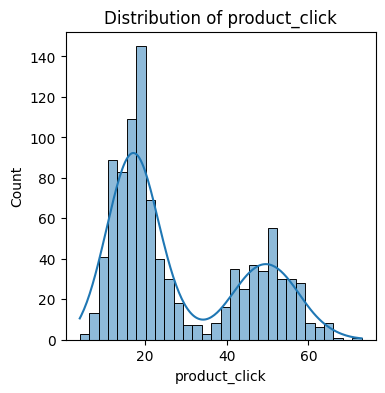

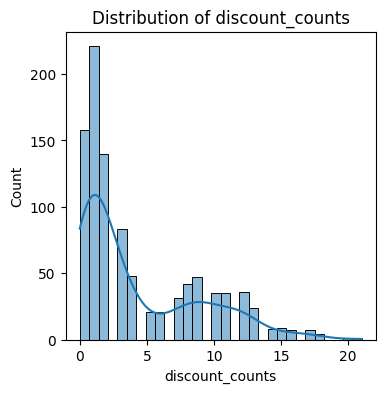

In [120]:
features = ["total_purchases", "avg_cart_value", "total_time_spent", "product_click", "discount_counts"]

for feature in features:
    plt.figure(figsize=(4, 4))
    sns.histplot(customers[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.show()

Outlier Detection

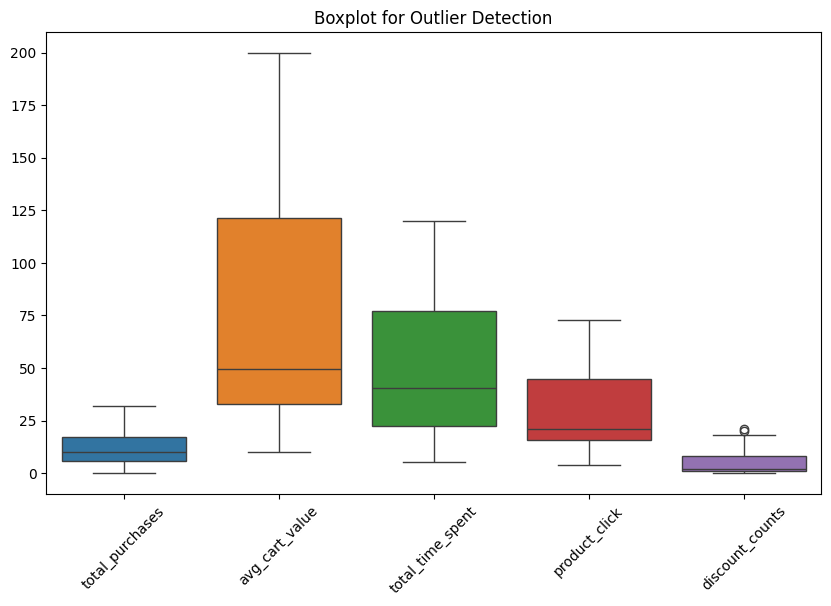

In [121]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=customers[features])
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

Correlation

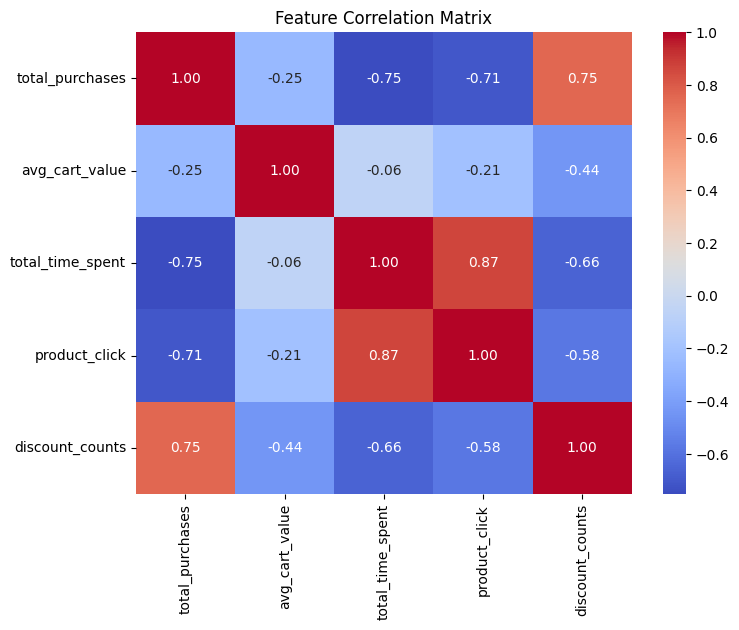

In [122]:
plt.figure(figsize=(8,6))
sns.heatmap(customers.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

Feature Engineering

In [123]:
# customers['purchase_efficiency'] = customers['avg_cart_value'] / (customers['total_purchases'] + 1)
# customers['time_per_product'] = customers['total_time_spent'] / (customers['product_click'] + 1)

# customers

In [101]:
# Since the correlation between total_time_spent and product_click is 0.87, we can drop one of them
customers = customers.drop(columns=["product_click", "total_time_spent"])
customers

KeyError: "['product_click', 'total_time_spent'] not found in axis"

In [124]:
customers

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
0,7.0,129.34,52.17,18.0,0.0
1,22.0,24.18,9.19,15.0,7.0
2,2.0,32.18,90.69,50.0,2.0
3,25.0,26.85,11.22,16.0,10.0
4,7.0,125.45,34.19,30.0,3.0
...,...,...,...,...,...
994,5.0,64.64,72.70,50.0,1.0
995,5.0,68.36,75.41,43.0,1.0
996,18.0,19.53,28.77,18.0,8.0
997,4.0,28.97,72.27,57.0,3.0


In [125]:
customers = customers.drop(columns=["purchase_efficiency"])


KeyError: "['purchase_efficiency'] not found in axis"

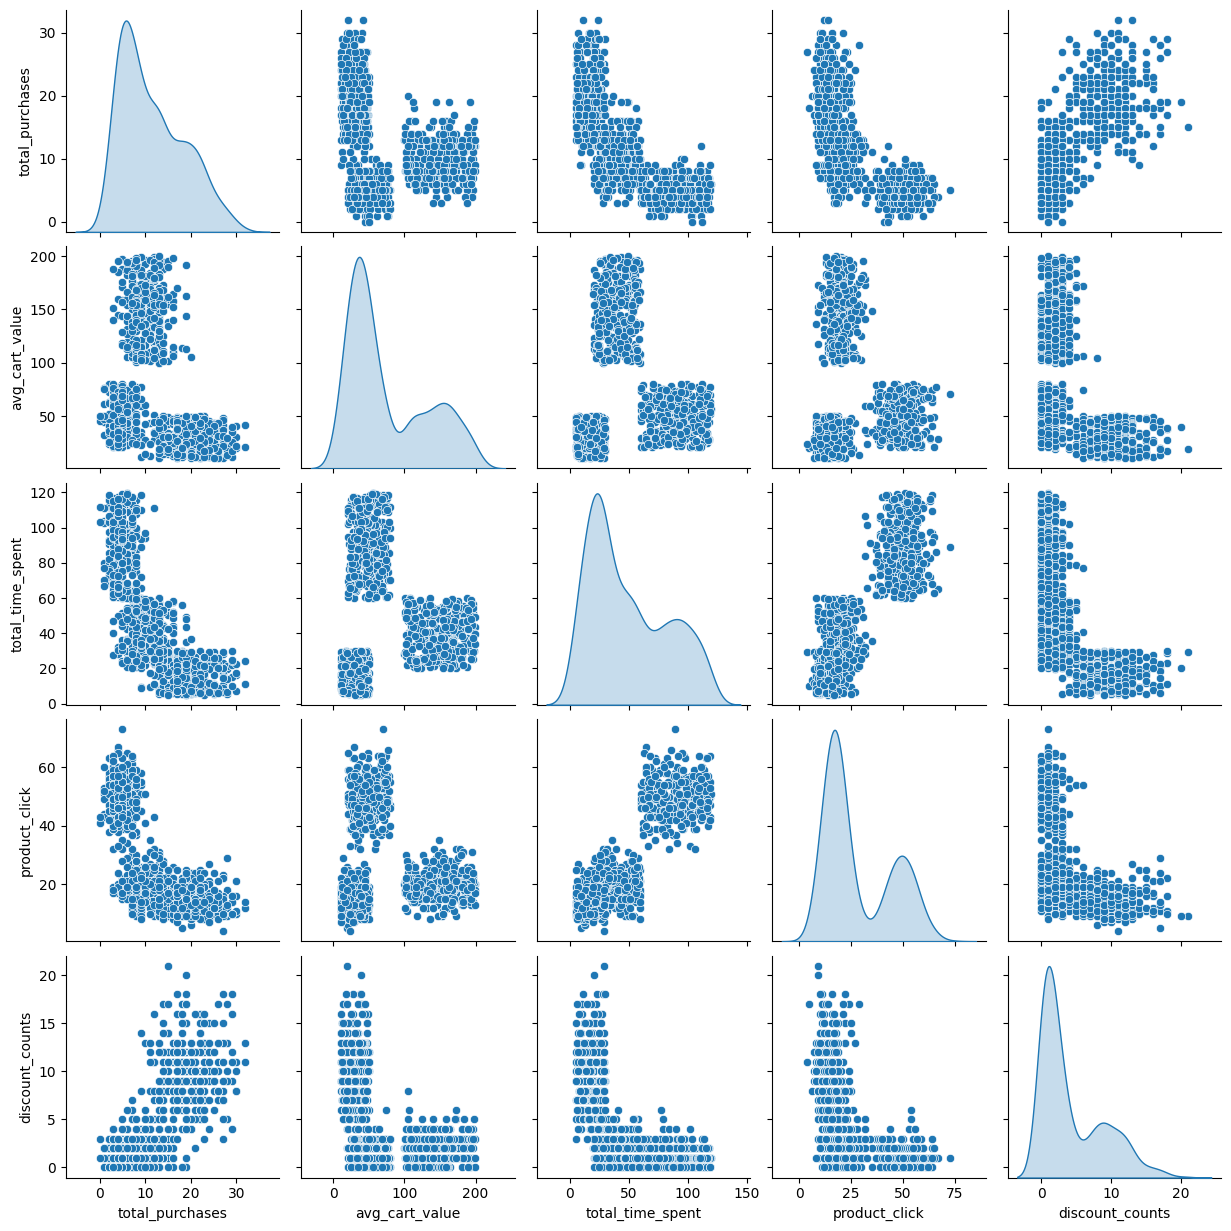

In [126]:
sns.pairplot(customers, diag_kind="kde")
plt.show()

Scale the data

In [127]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customers)

MODEL SELECTION

K Means Clustering

In [128]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

optimal_k = 3  # Assuming 3 is the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to your data
customers['cluster'] = kmeans.labels_


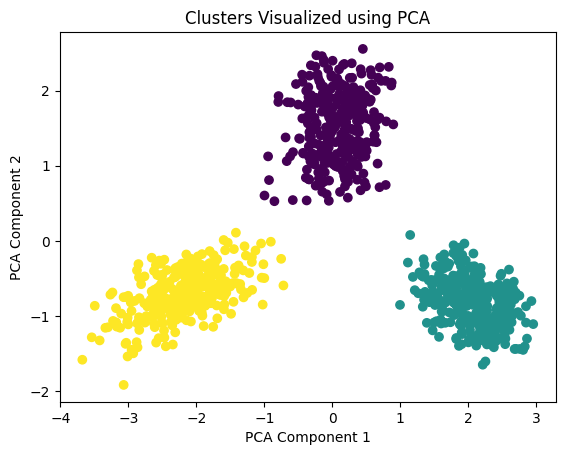

In [129]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=customers['cluster'], cmap='viridis')
plt.title('Clusters Visualized using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [130]:
cluster_centers = kmeans.cluster_centers_

# Convert the cluster centers to a DataFrame for easier interpretation
cluster_centers_df = pd.DataFrame(cluster_centers, columns=customers.columns[:-1])  # Exclude the 'cluster' column
print(cluster_centers_df)

   total_purchases  avg_cart_value  total_time_spent  product_click  \
0        -0.199010        1.305770         -0.277476      -0.512192   
1        -0.956571       -0.480165          1.243180       1.318663   
2         1.160839       -0.818654         -0.974183      -0.816132   

   discount_counts  
0        -0.518013  
1        -0.726757  
2         1.247639  


0 : High Spenders
1 : Bargain Hunters
2 : Window Shoppers

In [151]:
cluster_labels = {
    0: "High Spenders",
    1: "Bargain Hunters",
    2: "Window Shoppers"
}

# Map the cluster labels to the `cluster` column
customers['cluster_label'] = customers['cluster'].map(cluster_labels)

# Check the dataset with labels
print(customers)

     total_purchases  avg_cart_value  total_time_spent  product_click  \
0                7.0          129.34             52.17           18.0   
1               22.0           24.18              9.19           15.0   
2                2.0           32.18             90.69           50.0   
3               25.0           26.85             11.22           16.0   
4                7.0          125.45             34.19           30.0   
..               ...             ...               ...            ...   
994              5.0           64.64             72.70           50.0   
995              5.0           68.36             75.41           43.0   
996             18.0           19.53             28.77           18.0   
997              4.0           28.97             72.27           57.0   
998             29.0           39.29              9.99           16.0   

     discount_counts  cluster    cluster_label  dbscan_cluster  
0                0.0        0    High Spenders            

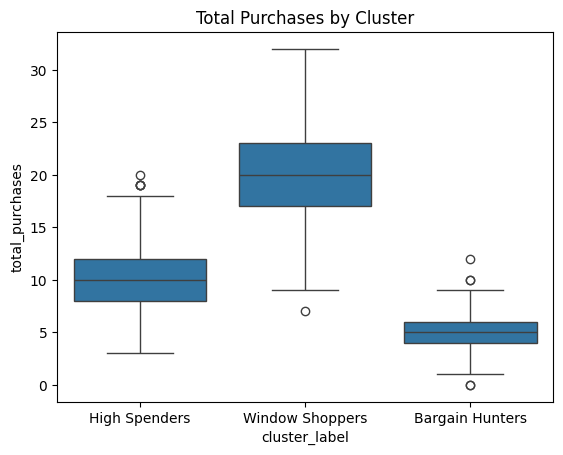

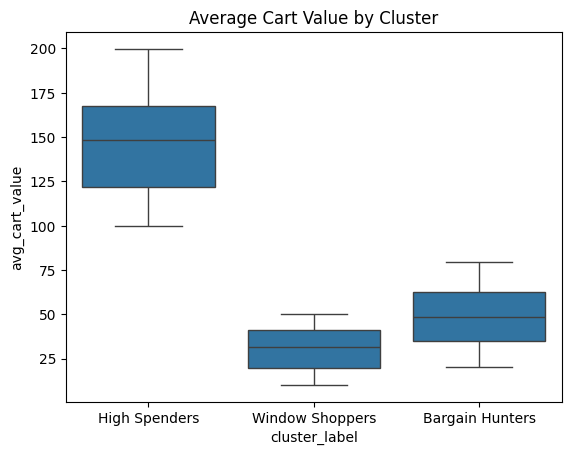

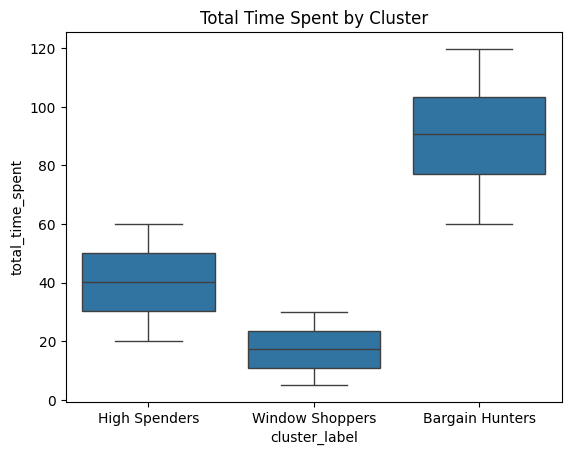

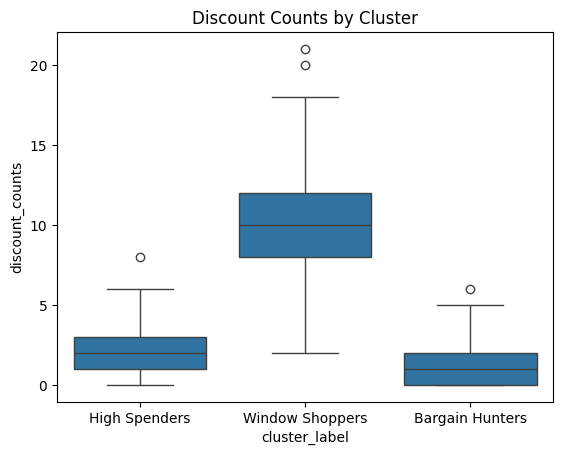

In [132]:
# 'total_purchases' across clusters
sns.boxplot(x='cluster_label', y='total_purchases', data=customers)
plt.title('Total Purchases by Cluster')
plt.show()

# 'avg_cart_value' across clusters
sns.boxplot(x='cluster_label', y='avg_cart_value', data=customers)
plt.title('Average Cart Value by Cluster')
plt.show()

# 'total_time_spent' across clusters
sns.boxplot(x='cluster_label', y='total_time_spent', data=customers)
plt.title('Total Time Spent by Cluster')
plt.show()

# 'discount_counts' across clusters
sns.boxplot(x='cluster_label', y='discount_counts', data=customers)
plt.title('Discount Counts by Cluster')
plt.show()

In [133]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
sil_score = silhouette_score(scaled_data, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.6260176986578468


In [134]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(scaled_data, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_score}")

Davies-Bouldin Index: 0.5499863872687267


In [150]:
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Inertia: 812.4713322917868


Agglomerative Clustering

In [136]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=3)
agglom_labels = agglom.fit_predict(scaled_data)

# Calculate Silhouette Score
sil_score_agglom = silhouette_score(scaled_data, agglom_labels)
print(f"Silhouette Score for Agglomerative Clustering: {sil_score_agglom}")

Silhouette Score for Agglomerative Clustering: 0.6260176986578468


In [137]:
from sklearn.metrics import davies_bouldin_score

db_score_agg = davies_bouldin_score(scaled_data, agglom_labels)
print(f"Davies-Bouldin Index for Agglomerative Clustering: {db_score_agg}")


Davies-Bouldin Index for Agglomerative Clustering: 0.5499863872687267


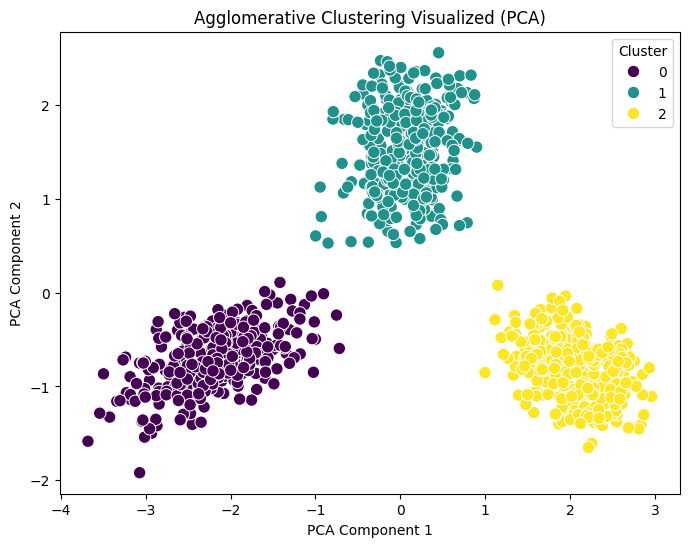

In [138]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=agglom_labels, palette='viridis', s=80)
plt.title("Agglomerative Clustering Visualized (PCA)")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.show()


DBScan

In [141]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
# clusters = dbscan.fit_predict(customers.drop('customer_id', axis=1))
clusters = dbscan.fit_predict(scaled_data)

In [143]:
# Adding the clusters back to the original dataframe for analysis
customers['dbscan_cluster'] = clusters


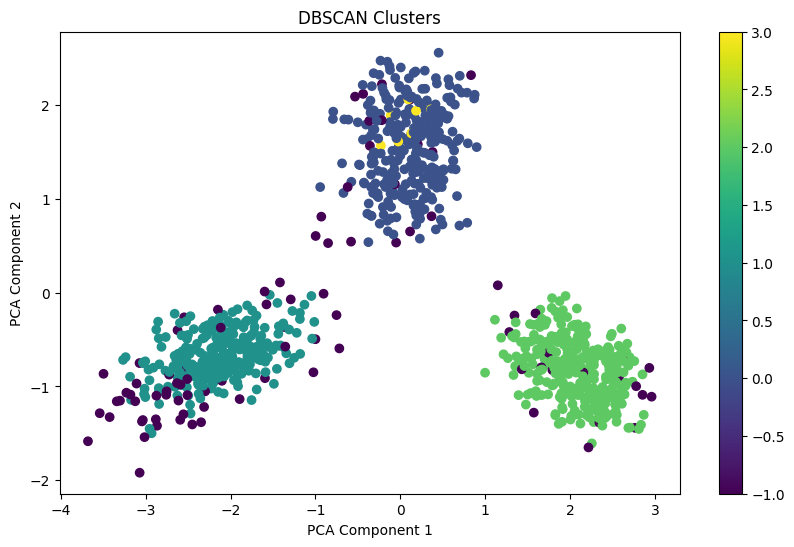

In [148]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from matplotlib import cm

# Reduce to 2 dimensions using PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Set up the color map for clusters
# The clusters will be assigned distinct colors
num_clusters = len(set(customers['dbscan_cluster'])) - (1 if -1 in customers['dbscan_cluster'].values else 0)
colors = cm.viridis(np.linspace(0, 1, num_clusters))

# Plotting the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], c=customers['dbscan_cluster'], cmap='viridis', marker='o')

# Adding color bar
plt.colorbar(scatter)

# Customize the title and labels
plt.title('DBSCAN Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Show the plot
plt.show()



In [146]:
sil_score_agglom = silhouette_score(scaled_data, agglom_labels)
print(f"Silhouette Score for DBSCAN Clustering: {sil_score_agglom}")

Silhouette Score for DBSCAN Clustering: 0.6260176986578468


In [149]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist

def dunn_index(X, labels):
    unique_labels = set(labels)
    clusters = [X[labels == label] for label in unique_labels]
    
    # Calculate the pairwise distances between points in each cluster
    cluster_distances = [cdist(cluster, cluster) for cluster in clusters]
    
    # Calculate the minimum distance between clusters
    inter_cluster_distances = []
    for i, cluster_i in enumerate(clusters):
        for j, cluster_j in enumerate(clusters):
            if i != j:
                inter_cluster_distances.append(np.min(cdist(cluster_i, cluster_j)))
    
    # Calculate the minimum distance within clusters (intra-cluster)
    intra_cluster_distances = [np.max(d) for d in cluster_distances]
    
    return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)

dunn_score = dunn_index(scaled_data, clusters)
print("Dunn Index: ", dunn_score)


Dunn Index:  0.0397701094932407


In [ ]:
Choose K Means as the model..... and did the clustering 
